In [2]:
import cv2
import numpy as np
import pandas as pd
import trackpy as tp
from skimage import io, filters, exposure

In [57]:
# Chemin de votre fichier image
name_manip = '2023_01_27_ASMOT055_BoiteCytoOne_HL5_15s_5x_P4_AX3Chi2_t0_21c'
image_path = f'/Users/souchaud/Desktop/A_analyser/CytoOne_HL5/{name_manip}/mosaic/mosaic_total_0.tif'  # Ajustez selon le chemin de votre fichier

# Charger l'image
image = io.imread(image_path)

# Pré-traitement
# 1. Correction de l'éclairage
#    Vous pouvez ajuster 'clip_limit' et 'tileGridSize' selon vos besoins
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
image_clahe = clahe.apply(image)


In [58]:

# 2. Filtrage du bruit
#    Choisissez un filtre et ajustez les paramètres selon vos besoins
image_filtered = filters.median(image_clahe, footprint=np.ones((3, 3)))

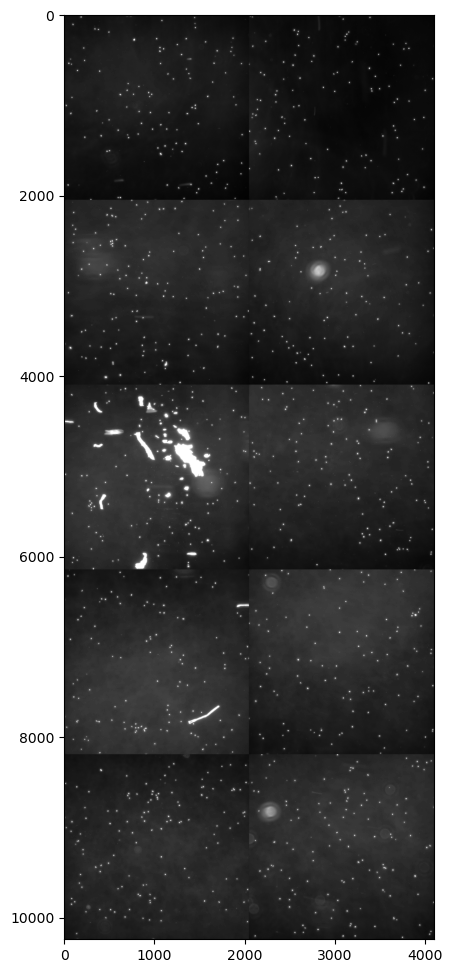

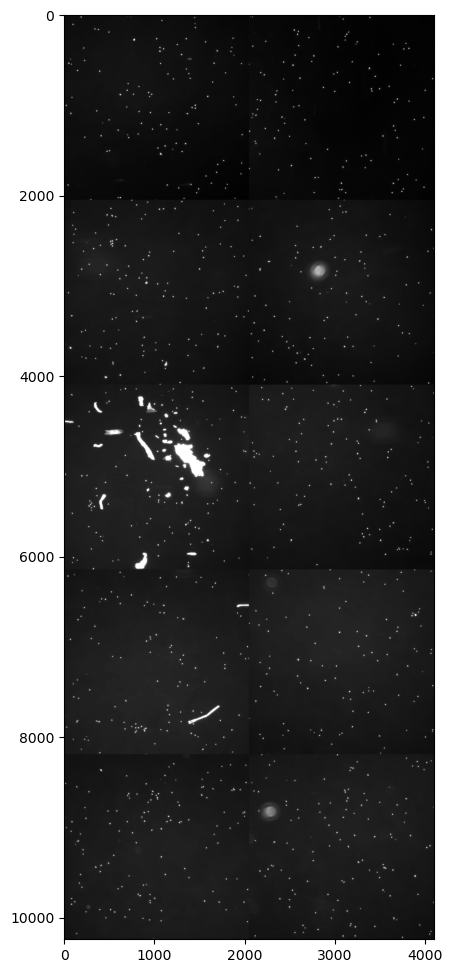

In [40]:
# Affichage des résultats
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
plt.imshow(image_clahe, cmap='gray')
plt.show()

plt.figure(figsize=(12, 12))
plt.imshow(image, cmap='gray')
plt.show()

In [62]:
# Consolidated parameters
PARAMS = {
    'diameter': 9,
    'minmass': 50,
    'max_size': 25,
    'separation': 15,
    'noise_size': 7,
    'smoothing_size': None,
    'invert': True,
    'percentile': 10,
    'topn': None,
    'preprocess': True,
    'max_iterations': 25,
    'filter_before': None,
    'filter_after': None,
    'characterize': True,
    'engine': 'auto',
    'threshold': 40,  # 90,
    'min_frames': 1,
    'max_displacement': 15,
    'frame_interval': 15,
    'pixel_size': 1.2773,
    'remove_exts': ['.jpg', '.svg', 'hdf5', '.png'],
    'long_time': True,
    'max_frame': 1000,
    # 'data_dir': '/Users/souchaud/Desktop/A_Analyser/CytoOne_HL5/',
    'data_dir': '/Users/souchaud/Desktop/A_Analyser/NonT_SorC/',
    # 'output_dir': '/Users/souchaud/Desktop/Analyses/CytoOne_HL5_longtime/'
    # 'data_dir': '/Volumes/Labo_Alex_Mac/A_analyser/CytoOne_HL5/',´
    # 'output_dir': '/Users/souchaud/Desktop/Analyses/CytoOne_HL5_longtime/'
    'output_dir': '/Users/souchaud/Desktop/Analyses/NonT_SorC_longtime_New/'
    }

In [63]:

# # 3. Seuillage (si nécessaire)
# #    Ajustez la méthode et les paramètres de seuillage selon vos besoins
# thresh = filters.threshold_otsu(image_filtered)
# binary_image = image_filtered > thresh

# Détection des cellules avec Trackpy
# Ajustez 'diameter', 'minmass', etc., selon les caractéristiques de vos cellules

f = tp.locate(image,
            diameter=PARAMS['diameter'],
            minmass=PARAMS['minmass'],
            maxsize=PARAMS['max_size'],
            separation=PARAMS['separation'],
            noise_size=PARAMS['noise_size'],
            smoothing_size=PARAMS['smoothing_size'],
            threshold=PARAMS['threshold'],
            invert=PARAMS['invert'],
            percentile=PARAMS['percentile'],
            topn=PARAMS['topn'],
            preprocess=PARAMS['preprocess'],
            max_iterations=PARAMS['max_iterations'],
            filter_before=PARAMS['filter_before'],
            filter_after=PARAMS['filter_after'],
            characterize=PARAMS['characterize'],
            engine=PARAMS['engine'])

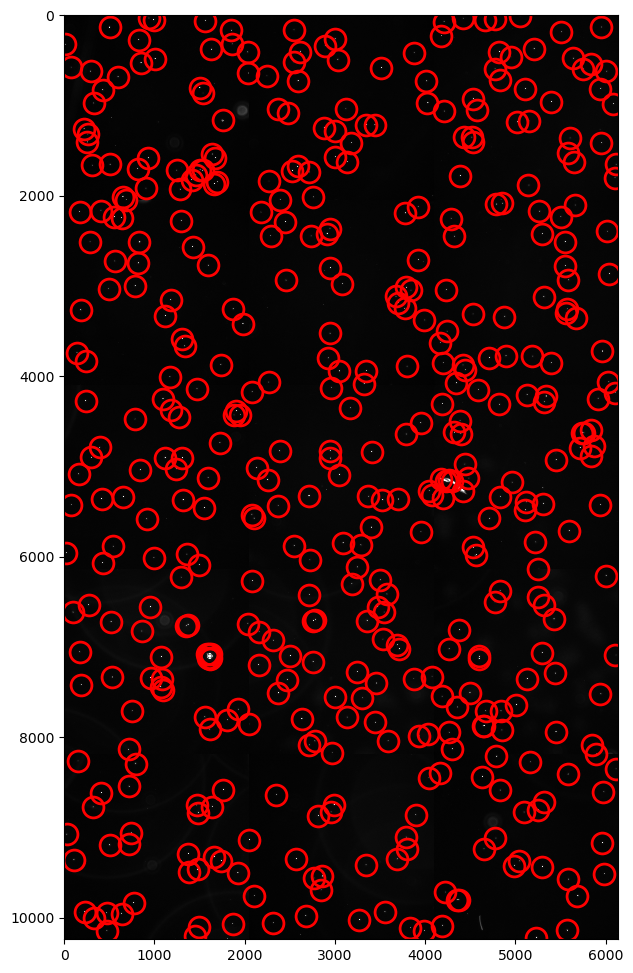

In [64]:
# Affichage des résultats
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
plt.imshow(image, cmap='gray')
tp.annotate(f, image)
plt.show()